First 5 rows of the dataset:
   flow_duration  Header_Length  Protocol Type  Duration         Rate  \
0       0.000000           0.00            1.0      64.0    31.168607   
1       0.054939       16089.00           17.0      64.0  5849.267798   
2      47.930071      120440.90            7.0      55.8    69.397964   
3       6.460751         109.66            6.0      64.0     0.314205   
4       2.771396     1511123.64           17.0      64.0   998.617998   

         Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  ...  \
0    31.168607    0.0              0.0              0.0              0.0  ...   
1  5849.267798    0.0              0.0              0.0              0.0  ...   
2    69.397964    0.0              0.0              0.0              0.0  ...   
3     0.314205    0.0              0.0              1.0              0.0  ...   
4   998.617998    0.0              0.0              0.0              0.0  ...   

        Std  Tot size           IAT  Number  

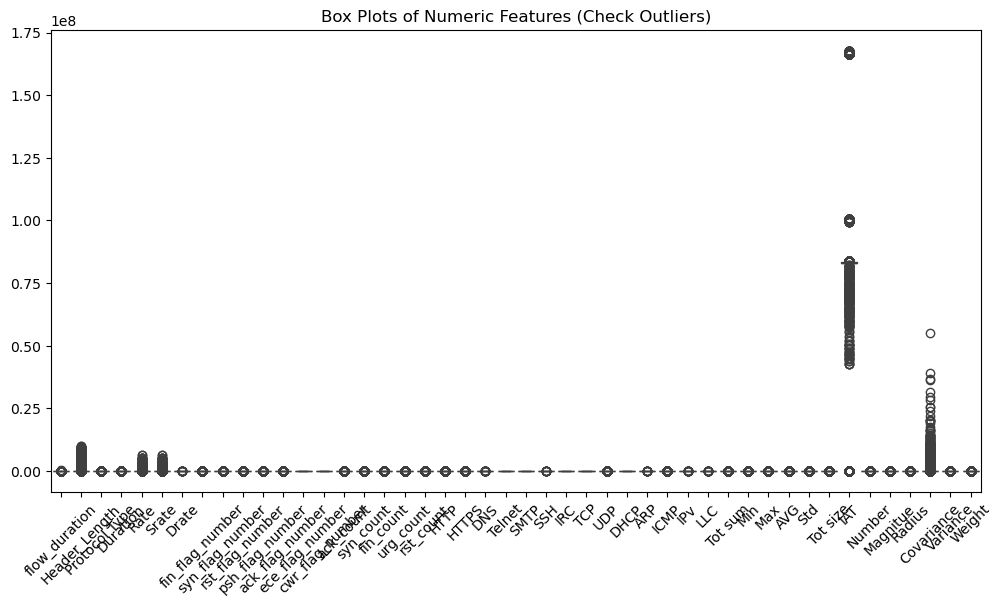

In [1]:
# Box plots for numeric columns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace 'cicio2023.csv' with your file path)
df = pd.read_csv('C:\\ProgramData\\anaconda3\\Lib\\site-packages\\pandas\\io\\parsers\\capstone\\part-00111-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv')

# Display first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Check basic info (columns, data types, non-null counts)
print("\nDataset info:")
print(df.info())

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title('Box Plots of Numeric Features (Check Outliers)')
plt.xticks(rotation=45)
plt.show()

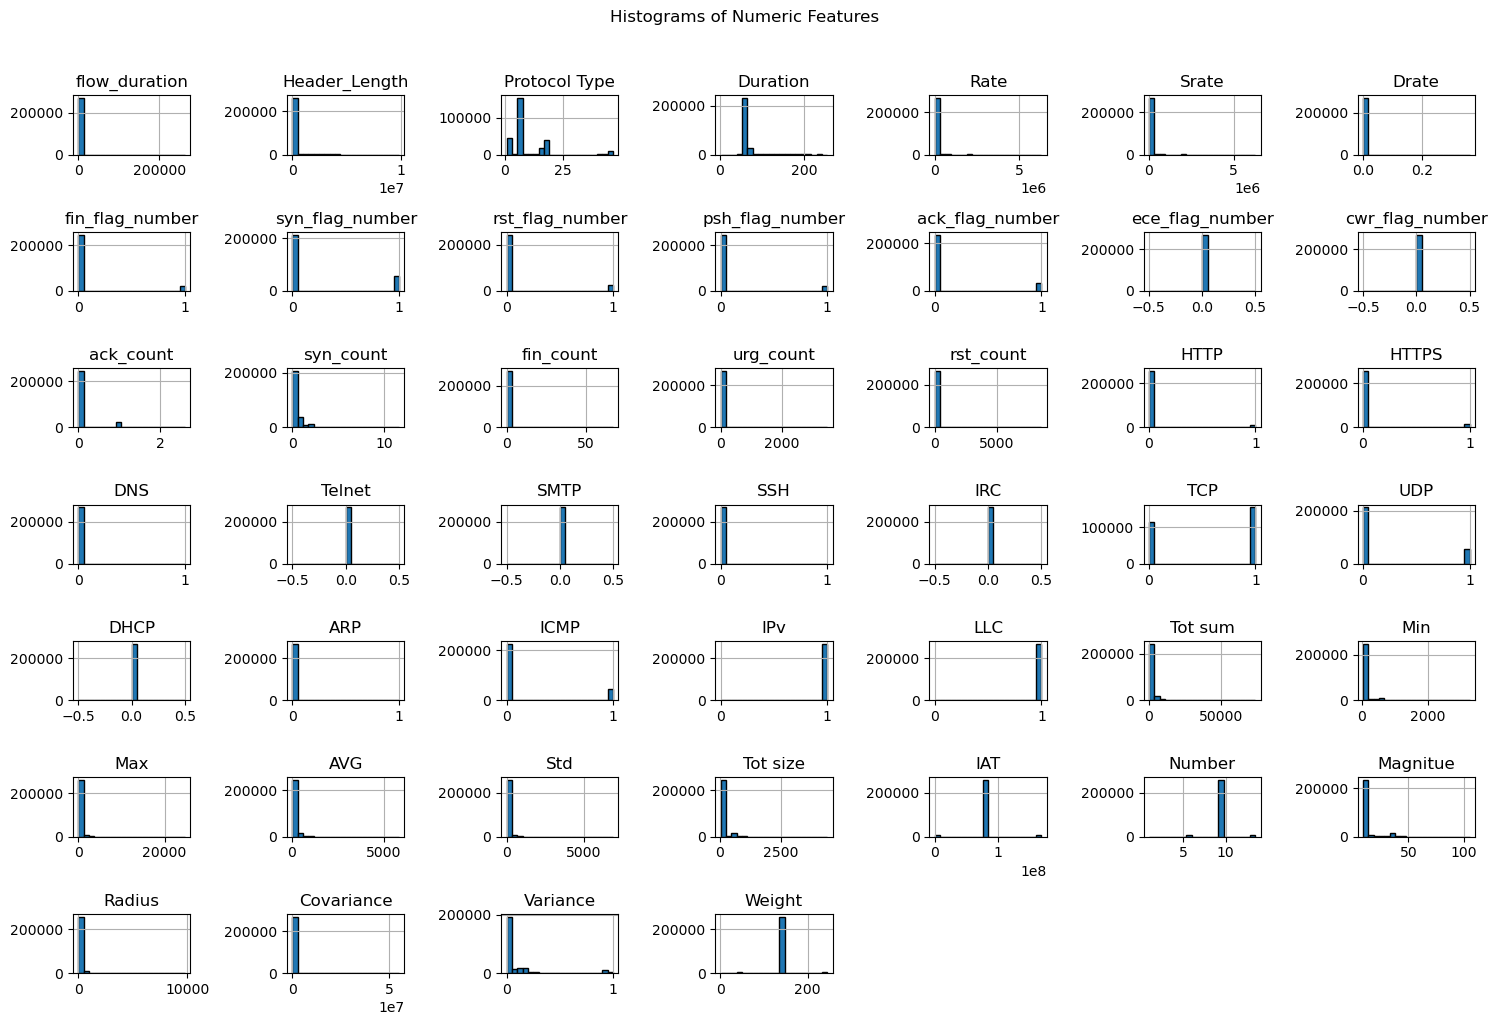

In [2]:
# Plot histograms for all numeric columns
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numeric Features', y=1.02)
plt.tight_layout()
plt.show()


Descriptive Statistics:
       flow_duration  Header_Length  Protocol Type       Duration  \
count  269253.000000   2.692530e+05  269253.000000  269253.000000   
mean        6.338971   7.496894e+04       9.072772      66.319995   
std       544.449210   4.490860e+05       8.965449      13.808594   
min         0.000000   0.000000e+00       0.680000       1.600000   
25%         0.000000   5.400000e+01       6.000000      64.000000   
50%         0.000000   5.400000e+01       6.000000      64.000000   
75%         0.104803   2.832600e+02      14.760000      64.000000   
max    262916.384502   9.840879e+06      47.000000     255.000000   

               Rate         Srate          Drate  fin_flag_number  \
count  2.692530e+05  2.692530e+05  269253.000000    269253.000000   
mean   9.056396e+03  9.056396e+03       0.000002         0.085908   
std    9.972051e+04  9.972051e+04       0.000717         0.280229   
min    0.000000e+00  0.000000e+00       0.000000         0.000000   
25%    2

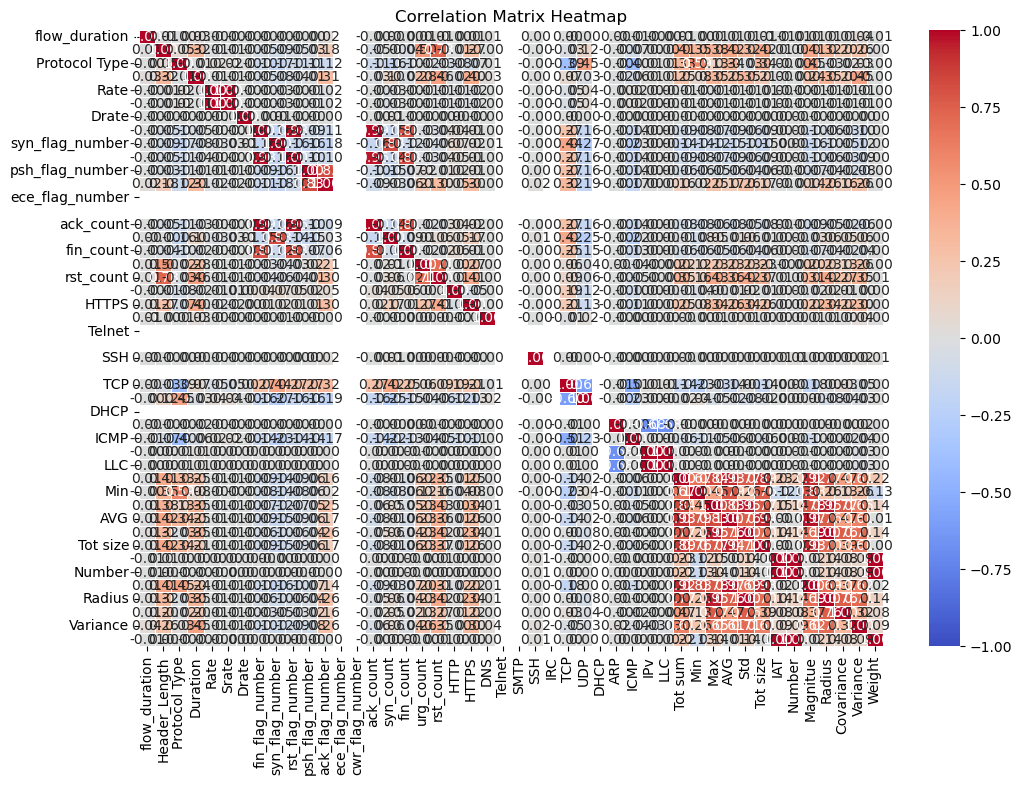

In [3]:
# Basic statistics (mean, std, quartiles, min, max)
print("\nDescriptive Statistics:")
print(df.describe())

# Compute variance for numeric columns
print("\nVariance:")
print(df.var(numeric_only=True))

# Compute quartiles (25%, 50%, 75%)
print("\nQuartiles (25%, 50%, 75%):")
print(df.quantile([0.25, 0.5, 0.75], numeric_only=True))

# Correlation matrix (for numeric features)
print("\nCorrelation Matrix:")
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    vmin=-1,
    vmax=1
)
plt.title('Correlation Matrix Heatmap')
plt.show()

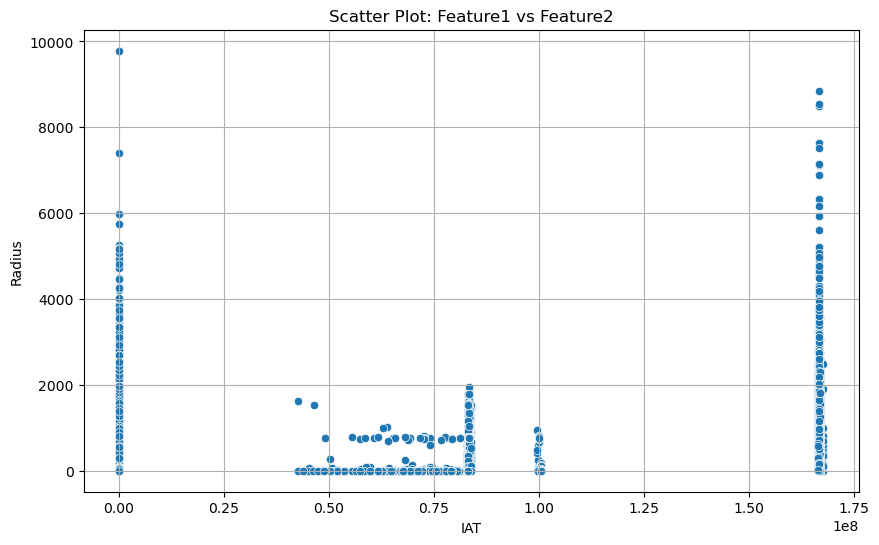

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IAT', y='Radius', data=df, alpha=1)
plt.title('Scatter Plot: Feature1 vs Feature2')
plt.grid(True)
plt.show()

In [5]:
print(df.isnull().sum())

# Drop columns with >30% missing data
threshold = 0.3 * len(df)
df_clean = df.dropna(axis=1, thresh=threshold)
X = df_clean.drop('label', axis=1)  # Replace 'label' with your target column
y = df_clean['label']
# Fill remaining NaNs with median (for numerical features)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64


In [6]:
X = X.drop_duplicates()
print("Remaining rows:", len(df_clean))

Remaining rows: 269253


In [7]:
for col in X.columns:
    if X[col].isnull().sum() > 0:
        X[f'{col}_missing'] = X[col].isnull().astype(int)

In [8]:
from scipy.stats import zscore

def remove_outliers_zscore(df, column, threshold=3):
    z_scores = zscore(df[column])
    return df[abs(z_scores) < threshold]

# Apply to 'transaction_amount' column
X = remove_outliers_zscore(df, 'IAT', threshold=3)

print("\nAfter Z-Score Outlier Removal (IAT):")
print(X)


After Z-Score Outlier Removal (IAT):
        flow_duration  Header_Length  Protocol Type  Duration          Rate  \
0            0.000000           0.00           1.00      64.0     31.168607   
1            0.054939       16089.00          17.00      64.0   5849.267798   
3            6.460751         109.66           6.00      64.0      0.314205   
4            2.771396     1511123.64          17.00      64.0    998.617998   
5            0.000000          54.00           6.00      64.0      1.167248   
...               ...            ...            ...       ...           ...   
269248       0.025977       12241.00          17.00      64.0  10800.108877   
269249       0.000000           0.00          47.00      64.0    120.460209   
269250       0.000000          54.00           6.00      64.0      5.992807   
269251       0.021521          63.71           6.22      64.0      3.964438   
269252       0.000000          54.00           6.00      64.0      0.952645   

             

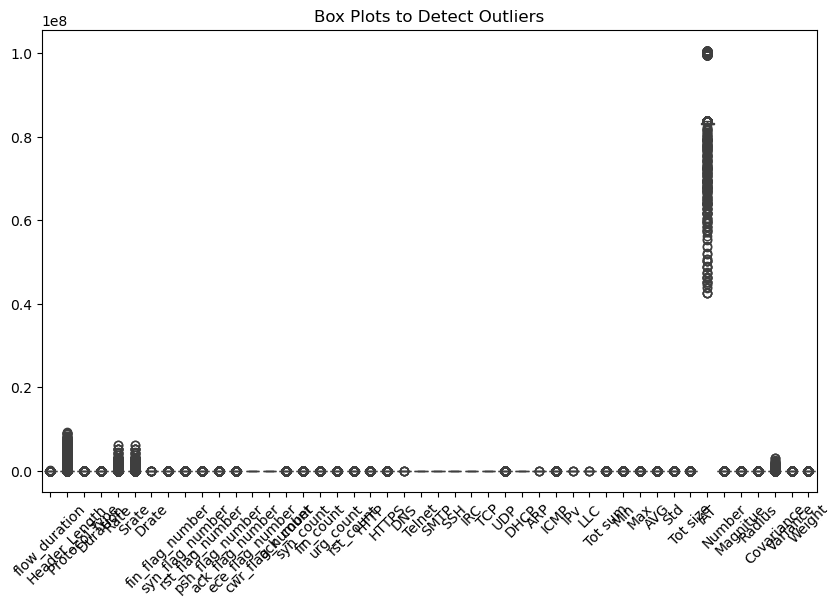

In [9]:
# Box plot for numeric columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=X.select_dtypes(include='number'))
plt.title("Box Plots to Detect Outliers")
plt.xticks(rotation=45)
plt.show()

In [10]:
import numpy as np
import pandas as pd

# Example data (replace with your actual data)
data = pd.DataFrame({'IAT': [1.0, 0.8, 0.6, 0.4, 0.2, 0.0]})

# Calculate IQR
Q1 = data['IAT'].quantile(0.25)
Q3 = data['IAT'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
filtered_data = data[(data['IAT'] >= lower_bound) & (data['IAT'] <= upper_bound)]

print("Original data:\n", data)
print("\nFiltered data (no outliers):\n", filtered_data)

Original data:
    IAT
0  1.0
1  0.8
2  0.6
3  0.4
4  0.2
5  0.0

Filtered data (no outliers):
    IAT
0  1.0
1  0.8
2  0.6
3  0.4
4  0.2
5  0.0


In [11]:
df.head()


,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.00,1.0,64.0,31.168607,31.168607,0.0,0.0,0.0,0.0,...,0.00000,42.0,8.312489e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
1,0.054939,16089.00,17.0,64.0,5849.267798,5849.267798,0.0,0.0,0.0,0.0,...,0.00000,50.0,8.309892e+07,9.5,10.000000,0.000000,0.000000,0.0,141.55,DDoS-UDP_Flood
2,47.930071,120440.90,7.0,55.8,69.397964,69.397964,0.0,0.0,0.0,0.0,...,57.64887,112.8,3.168271e-02,5.5,15.382748,81.527814,3717.818931,0.9,38.50,BenignTraffic
3,6.460751,109.66,6.0,64.0,0.314205,0.314205,0.0,0.0,1.0,0.0,...,0.00000,54.0,8.298106e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DoS-SYN_Flood
4,2.771396,1511123.64,17.0,64.0,998.617998,998.617998,0.0,0.0,0.0,0.0,...,0.00000,554.0,8.378469e+07,9.5,33.286634,0.000000,0.000000,0.0,141.55,Mirai-udpplain


In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split features (X) and labels (y)
X = df_clean.drop('label', axis=1)  # Replace 'label' with your target column
y = df_clean['label']

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Verify class distribution
print(y_balanced.value_counts())

label
DDoS-ICMP_Flood            41780
DDoS-SlowLoris             41780
DoS-HTTP_Flood             41780
Recon-OSScan               41780
Recon-PortScan             41780
DDoS-HTTP_Flood            41780
Recon-HostDiscovery        41780
VulnerabilityScan          41780
SqlInjection               41780
DDoS-UDP_Flood             41780
DictionaryBruteForce       41780
BrowserHijacking           41780
CommandInjection           41780
Backdoor_Malware           41780
XSS                        41780
Recon-PingSweep            41780
MITM-ArpSpoofing           41780
DDoS-ACK_Fragmentation     41780
DDoS-UDP_Fragmentation     41780
DNS_Spoofing               41780
Mirai-greip_flood          41780
DoS-TCP_Flood              41780
Mirai-greeth_flood         41780
DDoS-SynonymousIP_Flood    41780
DDoS-ICMP_Fragmentation    41780
DDoS-SYN_Flood             41780
DDoS-TCP_Flood             41780
DoS-UDP_Flood              41780
DDoS-PSHACK_Flood          41780
DDoS-RSTFINFlood           41780
Mira

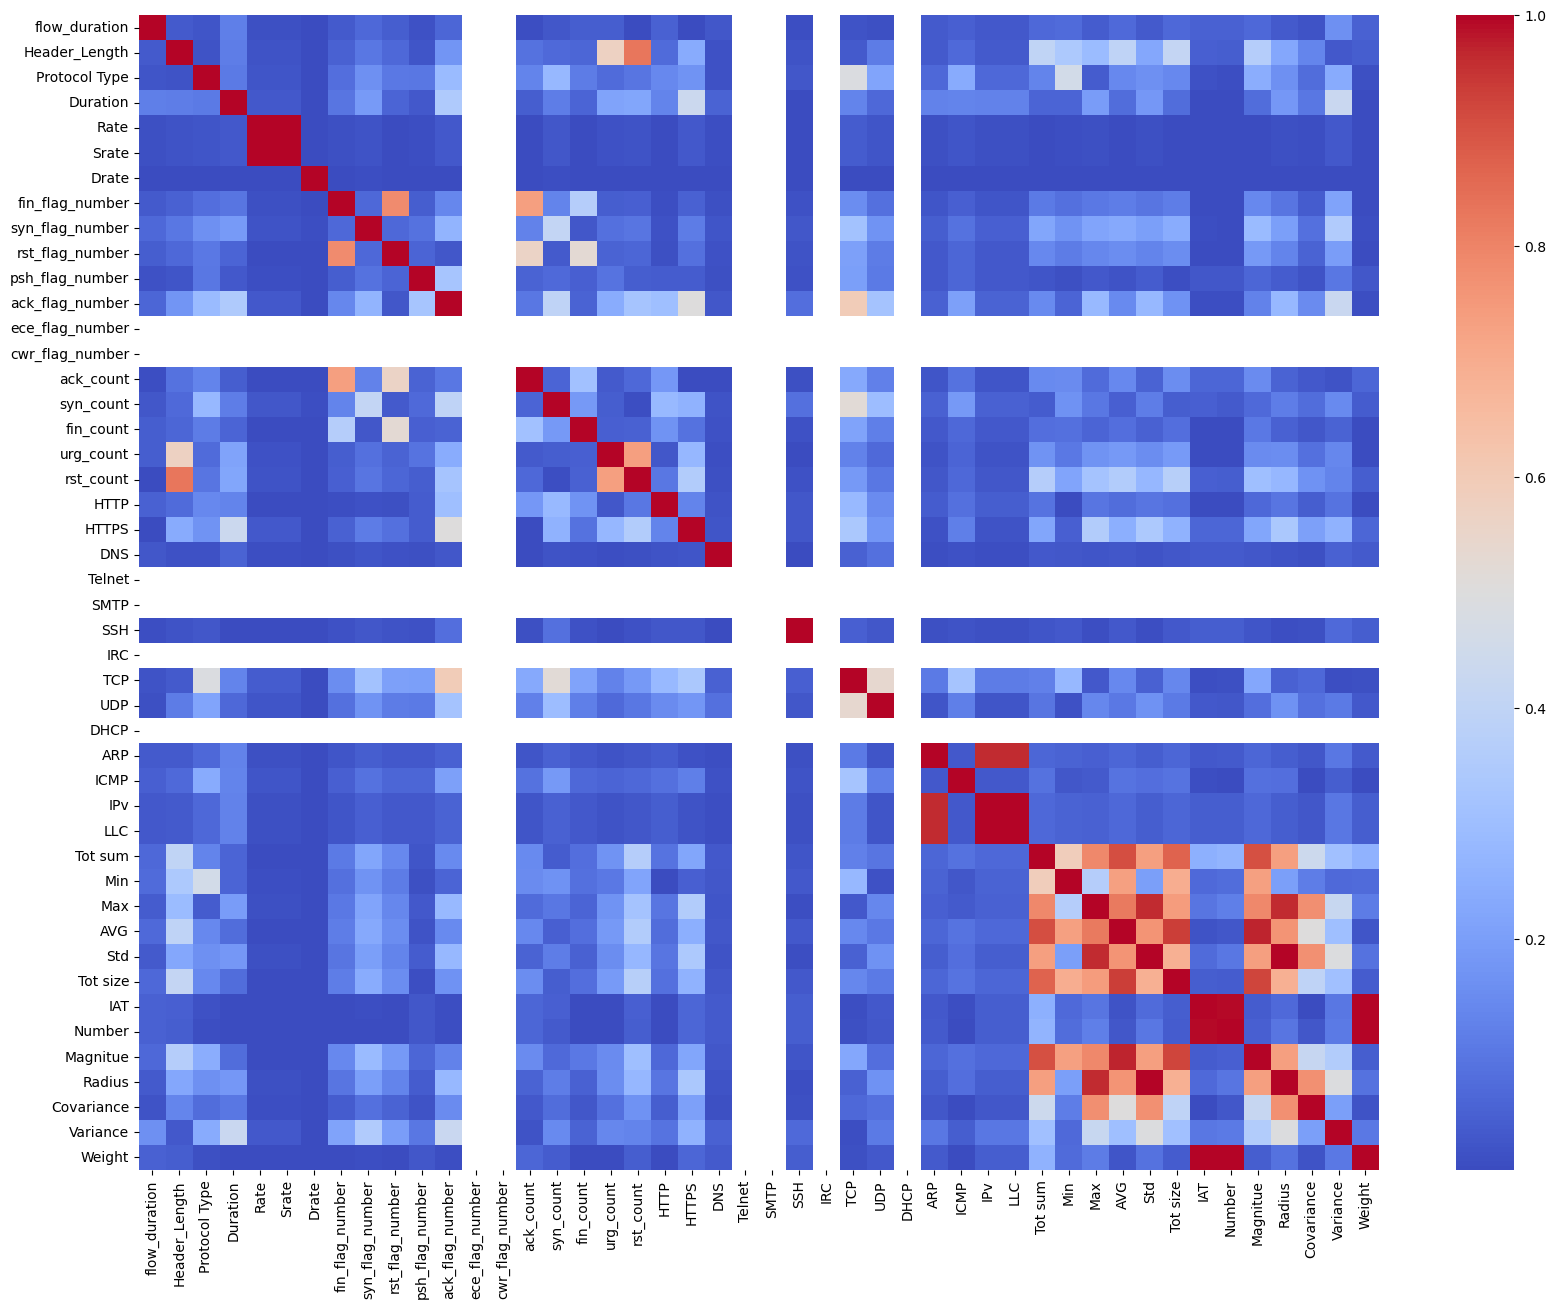

Reduced features: 36


In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = X_balanced.corr().abs()

# Visualize correlations (optional)
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

# Drop highly correlated features (threshold = 0.9)
threshold = 0.9
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
X_reduced = X_balanced.drop(to_drop, axis=1)
print("Reduced features:", X_reduced.shape[1])

In [14]:
from sklearn.preprocessing import StandardScaler

# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)
X_scaled = pd.DataFrame(X_scaled, columns=X_reduced.columns)

In [15]:

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_balanced, test_size=0.2, random_state=42
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (1136416, 36) Test shape: (284104, 36)


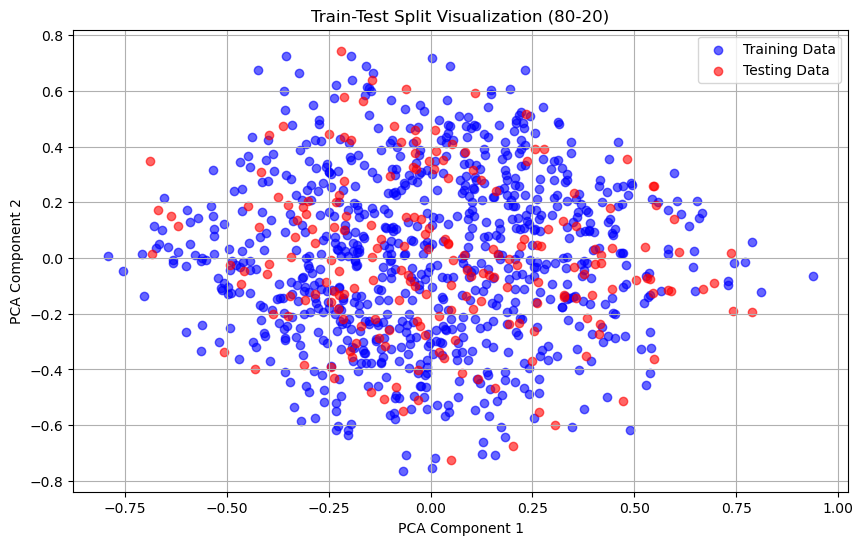

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA  # For dimensionality reduction (if needed)

np.random.seed(42)
X = np.random.rand(1000, 5)  # 1000 samples, 5 features
y = np.random.randint(0, 2, 1000)  # Binary labels

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reduce dimensionality for plotting (if features > 2)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # Apply PCA to entire dataset for visualization
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c='blue', label='Training Data', alpha=0.6)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c='red', label='Testing Data', alpha=0.6)
plt.title("Train-Test Split Visualization (80-20)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

In [17]:

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_balanced, test_size=0.2, random_state=42
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (1136416, 36) Test shape: (284104, 36)


In [22]:
pip install lightgbm scikit-learn tensorflow


  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl (376.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input
import lightgbm as lgb


# Separate features and labels
X = df.drop('label', axis=1)
y = df['label']

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)
num_classes = len(np.unique(y))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for CNN (samples, timesteps, features)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build CNN model
input_layer = Input(shape=(X_train_cnn.shape[1], 1))
x = Conv1D(64, kernel_size=3, activation='relu')(input_layer)
x = MaxPooling1D(2)(x)
x = Conv1D(128, kernel_size=3, activation='relu')(x)
x = MaxPooling1D(2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(num_classes, activation='softmax')(x)

cnn_model = Model(inputs=input_layer, outputs=output_layer)

# Compile and train CNN
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.fit(X_train_cnn, y_train,
              epochs=10,
              batch_size=64,
              validation_split=0.1)

# Feature extraction using CNN
feature_extractor = Model(inputs=cnn_model.input,
                          outputs=cnn_model.layers[-2].output)

X_train_features = feature_extractor.predict(X_train_cnn)
X_test_features = feature_extractor.predict(X_test_cnn)

# Train LightGBM on extracted features
lgb_model = lgb.LGBMClassifier(num_leaves=31,
                               learning_rate=0.05,
                               n_estimators=100)

lgb_model.fit(X_train_features, y_train)

# Evaluate
y_pred = lgb_model.predict(X_test_features)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Optional: Combine CNN features with original features
X_train_combined = np.concatenate([X_train, X_train_features], axis=1)
X_test_combined = np.concatenate([X_test, X_test_features], axis=1)

lgb_combined_model = lgb.LGBMClassifier()
lgb_combined_model.fit(X_train_combined, y_train)

y_pred_combined = lgb_combined_model.predict(X_test_combined)
print("\nCombined Model Accuracy:", accuracy_score(y_test, y_pred_combined))



Epoch 1/10
3030/3030 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.8232 - loss: 0.4142 - val_accuracy: 0.8484 - val_loss: 0.3187
Epoch 2/10
3030/3030 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8992 - loss: 0.2326 - val_accuracy: 0.9854 - val_loss: 0.0449
Epoch 3/10
3030/3030 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9858 - loss: 0.0424 - val_accuracy: 0.9870 - val_loss: 0.0358
Epoch 4/10
3030/3030 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9866 - loss: 0.0365 - val_accuracy: 0.9874 - val_loss: 0.0330
Epoch 5/10
3030/3030 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9869 - loss: 0.0354 - val_accuracy: 0.9878 - val_loss: 0.0321
Epoch 6/10
3030/3030 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9881 - loss: 0.0319 - val_accuracy: 0.9878 - val_loss: 0.0318
Epoch 7/10
3030/3030 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9885 - loss: 0.0308 - val_accuracy: 0.9890 - val_loss: 0.0309
Epoch 8/10
3030/3030 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9894 - loss: 0